<h1>Earthquake Project - Part II by Kathryn Chiang<h/>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from __future__ import division
from collections import Counter
from nltk.probability import FreqDist
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon


In [3]:
states = ['Alabama','Alaska','Arizona','Arkansas','California','Colorado','Connecticut','Delaware','Florida','Georgia','Hawaii','Idaho', 
          'Illinois','Indiana','Iowa','Kansas','Kentucky','Louisiana','Maine' 'Maryland','Massachusetts','Michigan','Minnesota',
          'Mississippi', 'Missouri','Montana','Nebraska','Nevada','New Hampshire','New Jersey','New Mexico','New York',
          'North Carolina','North Dakota','Ohio','Oklahoma','Oregon','Pennsylvania','Rhode Island','South  Carolina','South Dakota',
          'Tennessee','Texas','Utah','Vermont','Virginia','Washington','West Virginia','Wisconsin','Wyoming']
def title_time(df):
    """Input: dataframe
    Output: start time and end time of earthquake"""
    title = '%s through %s' % (str(df['time'][df['index']==min(df['index'])]).split()[1],str(df['time'][df['index']==max(df['index'])]).split()[1])
    return title

def get_marker_color(magnitude):
    """Input: magnitude
    Output: green for small earthquakes (<2), yellow for moderate
    earthquakes(<4), and red for significant earthquakes(>4)."""
    if magnitude < 2.0:
        return ('go')
    elif magnitude < 4.0:
        return ('yo')
    else:
        return ('ro')

def get_stat(statename):
    """Inpute: state name, ex: 'California'
    Output: earthquake information of that state"""
    ca = pd.DataFrame()
    for i in range(len(us)):
        if us['state'][i] == statename:
            ca = ca.append(us.loc[i])
    ca = ca.reset_index(drop=True)
    return ca

def map_mag(df,lllon,lllat,urlon,urlat, place):
    my_map = Basemap(projection='merc', lat_0=57, lon_0=-135,
                     resolution = 'h', area_thresh = 1000.0,
                     llcrnrlon=lllon, llcrnrlat=lllat,
                     urcrnrlon=urlon, urcrnrlat=urlat)

    my_map.drawcoastlines()
    my_map.drawcountries()
    my_map.fillcontinents(color='coral')
    my_map.drawmapboundary()
    my_map.drawstates()

    lats = df['latitude']
    lons = df['longitude']
    magnitudes = df['mag']
    min_marker_size = 2.5
    for lon, lat, mag in zip(lons, lats, magnitudes):
        x,y = my_map(lon, lat)
        msize = mag * min_marker_size
        marker_string = get_marker_color(mag)
        my_map.plot(x, y, marker_string, markersize=msize)
    title = 'Earthquakes of Magnitude in %s\n' % place
    title += title_time(df)
    plt.title(title)
    plt.show()

def map_mag_earth(df,lllon,lllat,urlon,urlat, place):
    """Input: place(string)"""
    my_map = Basemap(projection='merc', lat_0=57, lon_0=-135,
                     resolution = 'l', area_thresh = 1000.0,
                     llcrnrlon=lllon, llcrnrlat=lllat,
                     urcrnrlon=urlon, urcrnrlat=urlat)
    
    my_map.drawcoastlines()
    my_map.drawcountries()
    my_map.drawmapboundary()
    my_map.drawstates()
    my_map.bluemarble()

    lats = df['latitude']
    lons = df['longitude']
    magnitudes = df['mag']
    min_marker_size = 1.5
    for lon, lat, mag in zip(lons, lats, magnitudes):
        x,y = my_map(lon, lat)
        msize = mag * min_marker_size
        marker_string = get_marker_color(mag)
        my_map.plot(x, y, marker_string, markersize=msize)
    title = 'Landscape Map with Numbers of Earthquakes by Magnitude Strength in %s\n' % place
    title += title_time(df)
    plt.title(title)
    plt.show()    

def get_co_data(df):
    """Input: dataframe;
    Output: freq of magnitude strength"""
    colors = []
    for i in range(len(df)):
        if get_marker_color(df['mag'][i]) == 'go':
            m = 'small'
        elif get_marker_color(df['mag'][i]) == 'yo':
            m = 'moderate'
        else:
            m = 'significant'
        colors.append(m)
    x = range(len(colors))
    f = Counter(colors)
    return f

def ratio(df):
    """Input: dataframe
    Output: ratio percentage for each magnitude strength"""
    co = get_co_data(df)
    ratio = list()
    for i in range(len(co)):
        r = co.values()[i]/sum(co.values())*100
        ratio.append(r)
    return ratio


In [4]:
data = pd.read_csv('us_earthquake.csv')
us = data[["index", "time", "latitude","longitude","mag","state","place","depth"]]
us.head()


,index,time,latitude,longitude,mag,state,place,depth
0,0,2017-02-16T19:41:22.795Z,63.8717,-150.3950,1.3,Alaska,"70km W of Healy, Alaska",8.1
1,7,2017-02-16T17:11:22.122Z,62.6021,-149.8518,1.8,Alaska,"33km NNE of Talkeetna, Alaska",68.9
2,14,2017-02-16T16:28:06.568Z,61.4375,-151.6854,1.9,Alaska,"85km NNW of Nikiski, Alaska",83.8
3,19,2017-02-16T15:27:17.594Z,61.7097,-149.6386,1.6,Alaska,"9km NNW of Meadow Lakes, Alaska",30.5
4,20,2017-02-16T15:23:09.053Z,59.9683,-147.0029,2.0,Alaska,"70km NNW of Middleton Island, Alaska",16.5


The dataset I am using is the earthquakes occured in USA during Jan. 17 to Feb. 18. This dataset is extracted from the dataset from USGS official website which contains the earthquakes data for the entire world. I added a new column "state" to show the states each row of data locates. We will basicly use the longtitude, latitude, mag, time, place, depth, and index columns for this project.

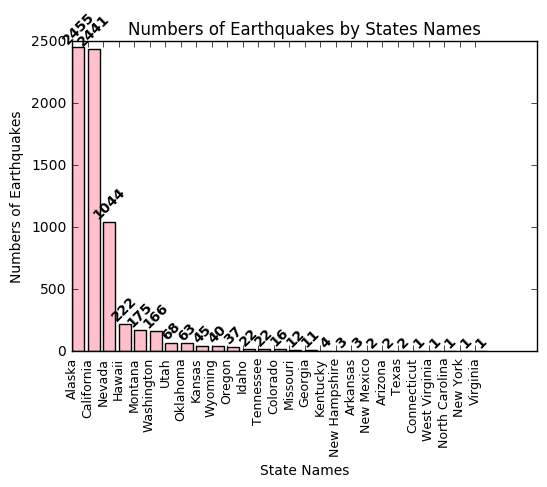

In [190]:
c = us['state'].value_counts()
x = c.values
y = c.index
l = np.arange(len(c))

fig,ax = plt.subplots()
rects = ax.patches
plt.bar(l, x, color = 'pink')
plt.xticks(l, y, size = 9,rotation = 90)
plt.ylabel('Numbers of Earthquakes')
plt.xlabel('State Names')
plt.title('Numbers of Earthquakes by States Names')
labels = x
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom',fontweight='bold',rotation = 45)
plt.show()

This is a histogram for numbers of earthquakes occured during the time of Jan. 17 to Feb. 18 and the numbers on top of each bar shows the times occured in that state. Most of the earthquakes occurs in Alaska and California, which has occured 2455 and 2441 times during the month.

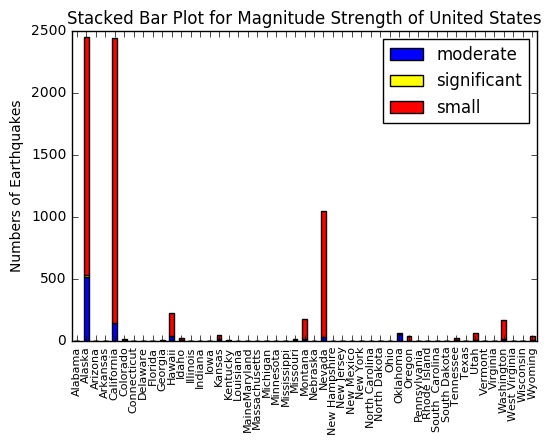

In [191]:
s = list()
m = list()
l = list()
for state in states:
    state_name = get_stat(state)
    co = get_co_data(state_name)
    vals = co['small'] #significant count value
    s.append(vals)
    valm = co['moderate'] 
    m.append(valm)
    vall = co['significant']
    l.append(vall)
sb = pd.DataFrame({'small':s, 'moderate':m, 'significant':l})
sb.plot(kind='bar', stacked=True, color = ['blue','yellow','red'])
plt.ylabel('Numbers of Earthquakes')
plt.title('Stacked Bar Plot for Magnitude Strength of United States')
plt.xticks(np.arange(len(states)), states, rotation = 90,size = 8)

plt.show()

<i>We can see the data more clearly by breaking down the y-axis.</i>

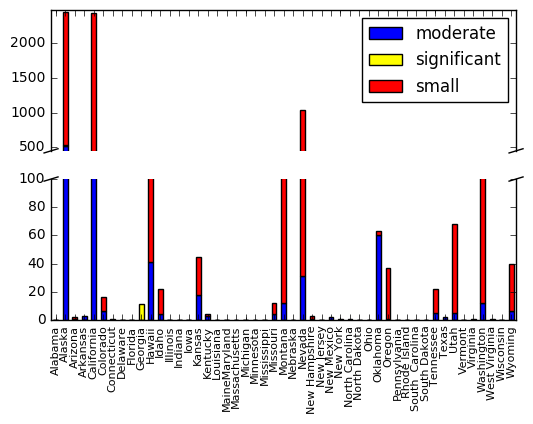

In [25]:
s = list()
m = list()
l = list()
for state in states:
    state_name = get_stat(state)
    co = get_co_data(state_name)
    vals = co['small'] #significant count value
    s.append(vals)
    valm = co['moderate'] 
    m.append(valm)
    vall = co['significant']
    l.append(vall)
df = pd.DataFrame({'small':s, 'moderate':m, 'significant':l})
f, axis = plt.subplots(2, 1, sharex=True)
df.plot(kind='bar', ax=axis[0],stacked=True, color = ['blue','yellow','red'])
df.plot(kind='bar', ax=axis[1],stacked=True, color = ['blue','yellow','red'])
plt.xticks(np.arange(len(states)), states, rotation = 90,size = 8)

axis[0].set_ylim(450, 2480)
axis[1].set_ylim(0, 100)
axis[1].legend().set_visible(False)

axis[0].spines['bottom'].set_visible(False)
axis[1].spines['top'].set_visible(False)
axis[0].xaxis.tick_top()
axis[0].tick_params(labeltop='off')
axis[1].xaxis.tick_bottom()
d = .015
kwargs = dict(transform=axis[0].transAxes, color='k', clip_on=False)
axis[0].plot((-d,+d),(-d,+d), **kwargs)
axis[0].plot((1-d,1+d),(-d,+d), **kwargs)
kwargs.update(transform=axis[1].transAxes)
axis[1].plot((-d,+d),(1-d,1+d), **kwargs)
axis[1].plot((1-d,1+d),(1-d,1+d), **kwargs)
plt.show()

The stacked bar plot above shows the distribution of the strength of the magnitude for each states in the USA. Small earthquakes (red color) have magnitudes less than 2; Moderate earthquakes (blue color) have magnitudes less than 4; And, significant earthquakes (yellow color) have magnitudes greater than 4. If we look at magnitude strength by ratio, most of the states have the highest ratio on small earthquakes and the lowest ratio on significant earthquakes.

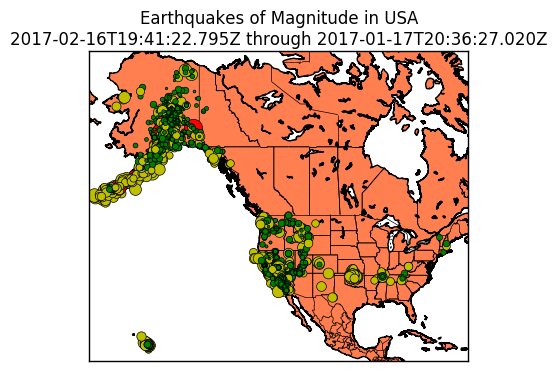

In [192]:
"""USA territories"""
map_mag(us, -172, 15, -65.25, 71,'USA')

The globel map above shows the magnitude of each earthquakes occured in the USA. There are 3 different catagories distingished by colors green, yellow, and red. Green color dots are for small earthquakes (magnitude less than 2), yellow color dots are for moderate earthquakes (magnitude less than 4), and red color dots are for significant earthquakes (magnitude greater than 4). On the graph, we can see that the dots are mostly spread on the east coast, south of Alaska, and some on Nevada and Hawaii, and red color magnitude dots are mostly shows in Alaska.

In [193]:
ak = get_stat('Alaska')
ca = get_stat('California')

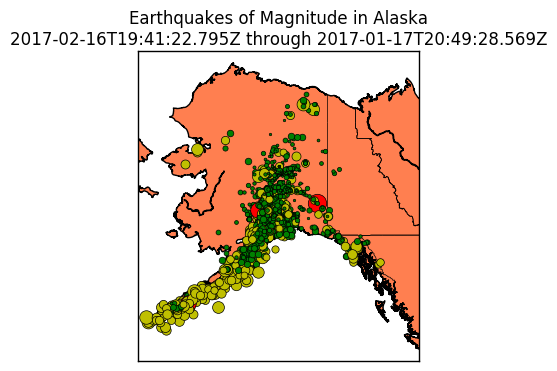

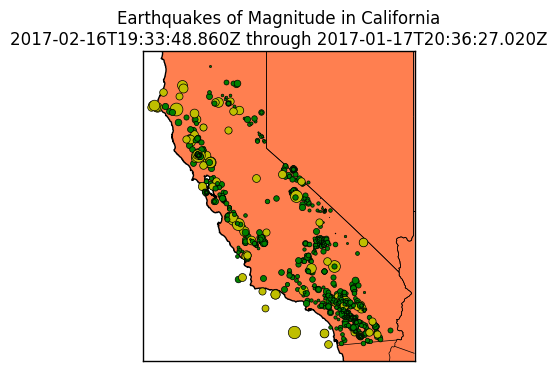

In [194]:
"""Alaska"""
map_mag(ak, -172, 48, -126, 72, 'Alaska')
"""California"""
map_mag(ca, -125, 32, -114, 42, 'California')

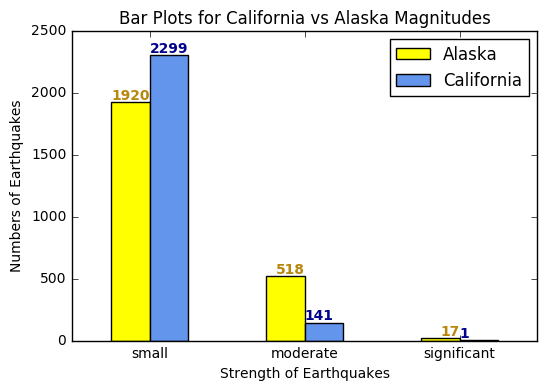

In [195]:
akv = get_co_data(ak).values()
cav = get_co_data(ca).values()
twobar = pd.DataFrame({'Alaska':akv, 'California':cav})
twobar.plot(kind='bar',color = ['yellow','cornflowerblue'])
ind = np.arange(3)
plt.xticks(range(3),get_co_data(ak).keys(),rotation = 0)
plt.ylabel('Numbers of Earthquakes')
plt.xlabel('Strength of Earthquakes')
plt.title('Bar Plots for California vs Alaska Magnitudes')
for a,b in zip(ind, akv): 
    plt.text(a, b, str(b),fontweight='bold',va='bottom',ha='right',color = 'darkgoldenrod')
for a,b in zip(ind, cav): 
    plt.text(a, b, str(b),fontweight='bold',va='bottom',ha='left',color = 'darkblue')

plt.show()

Comparing the barplots of magnitude strength for California and Alaska, we can see that the most earthquakes for both states are small earthquakes which has magnitude that are less than 2. However, Alaska has 379 less small earthquakes than the numbers of small earthquakes in California, but Alaska has 377 and 16 more moderate and significant earthquakes than the earthquakes in California. <strong>Let's look at their ratio.</strong>

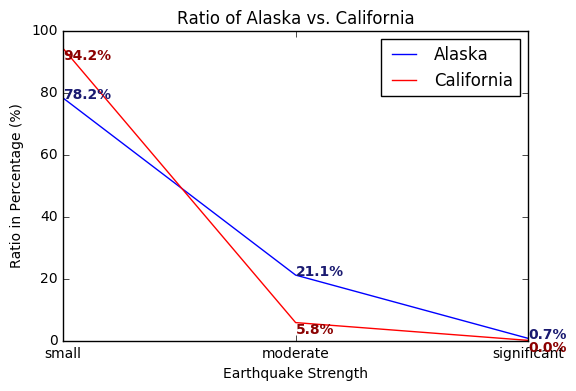

In [196]:
rak = ratio(ak)
rca = ratio(ca)
ind = range(len(rak))
co = get_co_data(ak)
plt.plot(rak,'blue',label = 'Alaska')
plt.plot(rca,'red',label = 'California')
plt.ylabel('Ratio in Percentage (%)')
plt.xlabel('Earthquake Strength')
plt.title('Ratio of Alaska vs. California')
plt.xticks(range(3), co.keys())

for a,b in zip(ind, rak): 
    plt.text(a, b, str(round(b,1)) + '%',fontweight='bold',color = 'midnightblue')
for a,b in zip(ind, rca): 
    plt.text(a, b, str(round(b,1)) + '%',fontweight='bold',va='top', color = 'darkred')
plt.legend(loc = 'upper right')

plt.show()

I divided each values by its total numbers of earthquakes, and then times 100 to get the percentage. Around 22% more of the earthquakes in Alaska are moderate or significant earthquakes, comparing to California's earthquakes. Alaska tends to have more moderate and significant earthquakes than California.

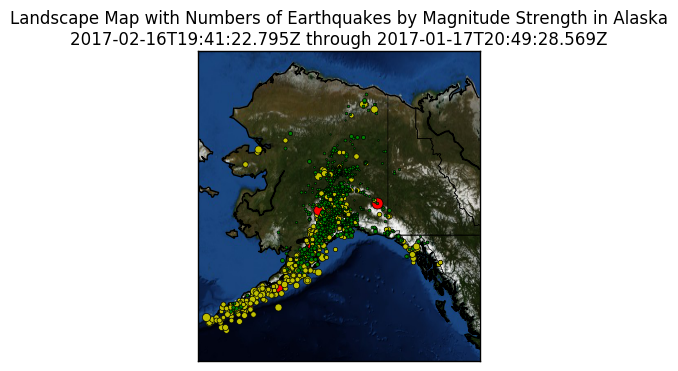

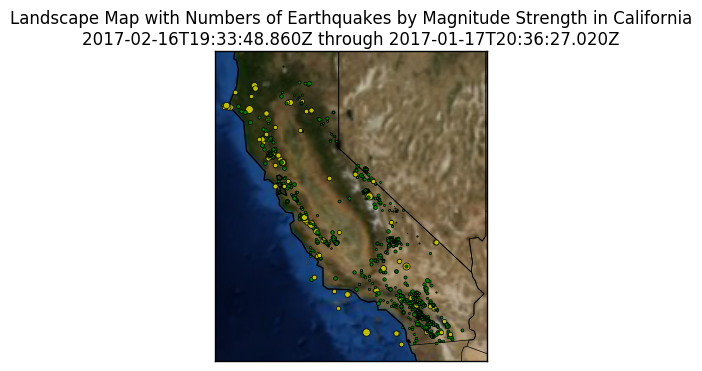

In [197]:
map_mag_earth(ak, -172, 48, -126, 72, 'Alaska') #alaska
map_mag_earth(ca, -125, 32, -114, 42, 'California') #california

Comparing the landscape maps for California and Alaska, the dots shows the magnitude of each earthquake, we can see that the dots are mostly fall on the darker or white areas where the mountains are or the area that is close to the ocean.

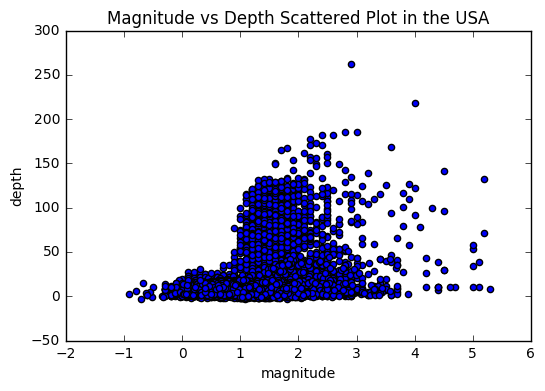

In [21]:
plt.scatter(us['mag'],us['depth'])
plt.ylabel('depth')
plt.xlabel('magnitude')
plt.title('Magnitude vs Depth Scattered Plot in the USA')
plt.show()

In [20]:
df = us[['mag','depth']]
df.corr()

,mag,depth
mag,1.000000,0.327762
depth,0.327762,1.000000


We got the correlation coefficient to be 0.33. Therefore, there does not seems to have to relationship between magnitude and depth in the USA. 

<strong>Conclusion:</strong>
Most earthquakes in United States occur at the west coast in California and North Alaska. Comparing California to Alaska, we found out that Alaska has more moderate and significant earthquakes than California has. Also, earthquakes tend to be near the ocean or on the mountain area. Thus, we can conclude that location have some impact on earthquakes in the US, but depth does not have an impect on earthquakes in the US.